In [2]:
import numpy as np 
import itertools
import sys 
sys.path.append('../')
from core.ranking_utils import * 
import itertools 
from core.pse import pseudo_embedding
from core.tensor_label_model_pse import TensorLabelModelPSE
import scipy

from core.exp_label_model import * 
from core.pse import pseudo_embedding 

In [3]:
from expressions_utils import * 

lst_T = generate_all_trees()

D =  compute_distances(lst_T,13,7,4,2) 


In [4]:


def get_errors(D):
  D = D**2
  n = D.shape[0]
  err = np.zeros(n-1)
  for dim in range(1,n):
      X, tk = pseudo_embedding(D, dim=dim)
      
      rec = np.zeros((n, n))
      for i in range(n):
          for j in range(n):
              rec[i,j] = np.abs(np.linalg.norm(X[i,:tk]-X[j,:tk])**2 - np.linalg.norm(X[i,tk:]-X[j,tk:])**2)
              if i != j:
                  dij = 1 if np.sqrt(D[i,j]) < 1e-5 else np.sqrt(D[i,j])
                  err[dim-1] += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/dij
                  #err += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/np.sqrt(D[i,j])
      err[dim-1]/= (n*(n-1))
      #err/= (n*(n-1))
      print(err[dim-1],tk,dim)
  return err

0.9562608335705812 1 1
0.9562608369779586 1 2
0.9562607899456883 2 3
0.9562606150717322 2 4
0.9562604626550334 3 5
0.9562602756529957 3 6
1.507026738003057e-08 4 7
2.4385364746835176e-08 4 8
2.5966535949894793e-08 4 9
2.326751178373817e-08 5 10
1.5526563642462798e-08 6 11
1.5462805168936948e-08 6 12
1.5300994135622525e-08 6 13
1.5355407572581846e-08 7 14
1.5355407572581846e-08 7 15
1.5355407572581846e-08 7 16
1.5355407572581846e-08 7 17
1.5355407572581846e-08 7 18
1.5355407572581846e-08 7 19
1.5355407572581846e-08 7 20
1.5355407572581846e-08 7 21
1.5355407572581846e-08 7 22
1.5355407572581846e-08 7 23
1.5355407572581846e-08 7 24
1.5355407572581846e-08 7 25
1.5355407572581846e-08 7 26
1.5355407572581846e-08 7 27
1.5355407572581846e-08 7 28
1.5355407572581846e-08 7 29
1.5355407572581846e-08 7 30
1.5355407572581846e-08 7 31
1.5355407572581846e-08 7 32
1.5355407572581846e-08 7 33
1.5355407572581846e-08 7 34
1.5355407572581846e-08 7 35
1.5355407572581846e-08 7 36
1.5355407572581846e-08 7 37

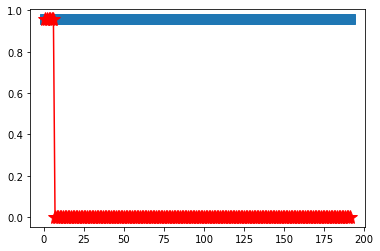

In [5]:
import matplotlib.pyplot as plt 

errs_square = get_errors(D)
mds_errs_square = errs_square[:6].tolist() + [errs_square[5]]*(len(errs_square)-6)
plt.plot(list(range(1,len(mds_errs_square)+1)), mds_errs_square, marker='s',markersize=10,label='MDS')
errs_square2 = errs_square.tolist() #+ [errs_square[2]]
plt.plot(list(range(1,len(errs_square2)+1)), errs_square2,marker='*',markersize=15,color='red',label='PSE')
